# Very basic framework for Data Science:

1) Define the problem<br>
2) Gather the data<br>
3) Prepare the data<br>
4) Explore and analyze the data<br>
5) Model the data<br>
6) Validate and implement the data model<br>
7) Optimize and Strategize the data model


In [14]:
# Import modules

import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Read data into "data"
data = pd.read_csv("C:/Users/HP/Desktop/Likelihood_to_puchase_sample_data.csv", engine="python")

Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.22.0
matplotlib version: 2.1.2
NumPy version: 1.14.0
SciPy version: 1.0.0
IPython version: 6.2.1
scikit-learn version: 0.19.1
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
# A dataset should be broken into 3 splits: train, test, and (final) validation

# Where to cut the training data from the test data
train_test_cut = 60000

# Where to cut the test data from the validation data
test_val_cut = 80000

data_train = data.iloc[:train_test_cut] # train data assigned (raw)

data_test = data.iloc[traitest_cut:test_val_cut]# TEST DATA NOT ASSIGNED YET

data_val = data.iloc[testn__val_cut:] # validate data assigned


# to play with our data we'll create a copy
# python assignment or equal passes by reference vs values, so we use the copy function: 
# deep = True means every object is given new id
# Concatenating train and test copies
data1 = pd.concat([data_train.copy(deep = True), data_test.copy(deep = True)])

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
print (data1.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
data1.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
Unnamed: 0                           80000 non-null int64
current_total_landing_count          80000 non-null int64
current_other_landing_count          80000 non-null int64
current_product_landing_count        80000 non-null int64
current_cart_landing_count           80000 non-null int64
current_sale_amount                  80000 non-null int64
current_is_sale                      80000 non-null int64
current_avg_cart_amount              80000 non-null int64
current_avg_visited_product_price    80000 non-null int64
referrer                             80000 non-null object
last_1_day_session_count             80000 non-null int64
last_7_day_session_count             80000 non-null int64
date                                 80000 non-null object
dtypes: int64(11), object(2)
memory usage: 7.9+ MB
None


,Unnamed: 0,current_total_landing_count,current_other_landing_count,current_product_landing_count,current_cart_landing_count,current_sale_amount,current_is_sale,current_avg_cart_amount,current_avg_visited_product_price,referrer,last_1_day_session_count,last_7_day_session_count,date
0,1,1,1,0,0,0,0,0,0,google,0,0,08/05/2014 09:09
1,2,1,0,1,0,0,0,0,0,google,0,3,09/05/2014 18:33
2,3,1,1,0,0,0,0,0,0,google,0,1,17/05/2014 17:59
3,4,2,2,0,0,0,0,0,0,facebook,1,7,18/05/2014 15:33
4,5,1,0,1,0,0,0,69,0,other,13,13,15/05/2014 16:59


# The 4 C's of Data Cleaning

1) Correcting: Correct non-acceptable data inputs. No problems here. <br>
2) Completing: Fixing irrelevant values. <br>
3) Creating<br>
4) Converting

In [4]:
# COMPLETE
# Index (Unnamed) dropped because rows already function as index.

# current_sale_amount dropped because any value above zero would already mean the user has bought something.
# Hence huge bias, and that information would not be accessible until after the purchase has been made,
# which is when prediction would become useless.

drop_columns = ["Unnamed: 0", "current_sale_amount", "date"] # DATE TEMPORARILY DROPPED FOR EASE
data1.drop(drop_columns, axis=1, inplace = True)

In [5]:
# CREATE

# Convert data to DAY OF WEEK and TIME OF DAY



In [6]:
# CONVERT
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['total_landing_count'] = label.fit_transform(dataset['Sex'])
    dataset['other_landing_count'] = label.fit_transform(dataset['Embarked'])
    dataset['product_landing'] = label.fit_transform(dataset['Title'])
    dataset['cart_landing'] = label.fit_transform(dataset['AgeBin'])
    dataset['sale_amount'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()



# referrer_dummies = pd.get_dummies(data['referrer'],prefix='referrer')
# data1_refer = data.copy()
# data1_refer = pd.concat([data,referrer_dummies],axis=1)
# data1_refer.drop('referrer',axis=1,inplace=True)
# data1_refer.drop(data.columns[0],axis=1,inplace=True)
# data1 = data1_refer



In [7]:
data1.head()

,current_total_landing_count,current_other_landing_count,current_product_landing_count,current_cart_landing_count,current_sale_amount,current_is_sale,current_avg_cart_amount,current_avg_visited_product_price,last_1_day_session_count,last_7_day_session_count,date,referrer_facebook,referrer_google,referrer_other
0,1,1,0,0,0,0,0,0,0,0,08/05/2014 09:09,0,1,0
1,1,0,1,0,0,0,0,0,0,3,09/05/2014 18:33,0,1,0
2,1,1,0,0,0,0,0,0,0,1,17/05/2014 17:59,0,1,0
3,2,2,0,0,0,0,0,0,1,7,18/05/2014 15:33,1,0,0
4,1,0,1,0,0,0,69,0,13,13,15/05/2014 16:59,0,0,1


In [ ]:
# type(data1.at[0, "date"])
# datetime.datetime.strptime(date_date, "%Y-%m-%d %H:%M:%S.%f")
# from datetime import datetime

# datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
# datetime_object.time().strftime('%H:%M:%S')

# Split Training and Testing Data

In [8]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Text(0.5,1,'Pclass vs Age current_is_sale Comparison')

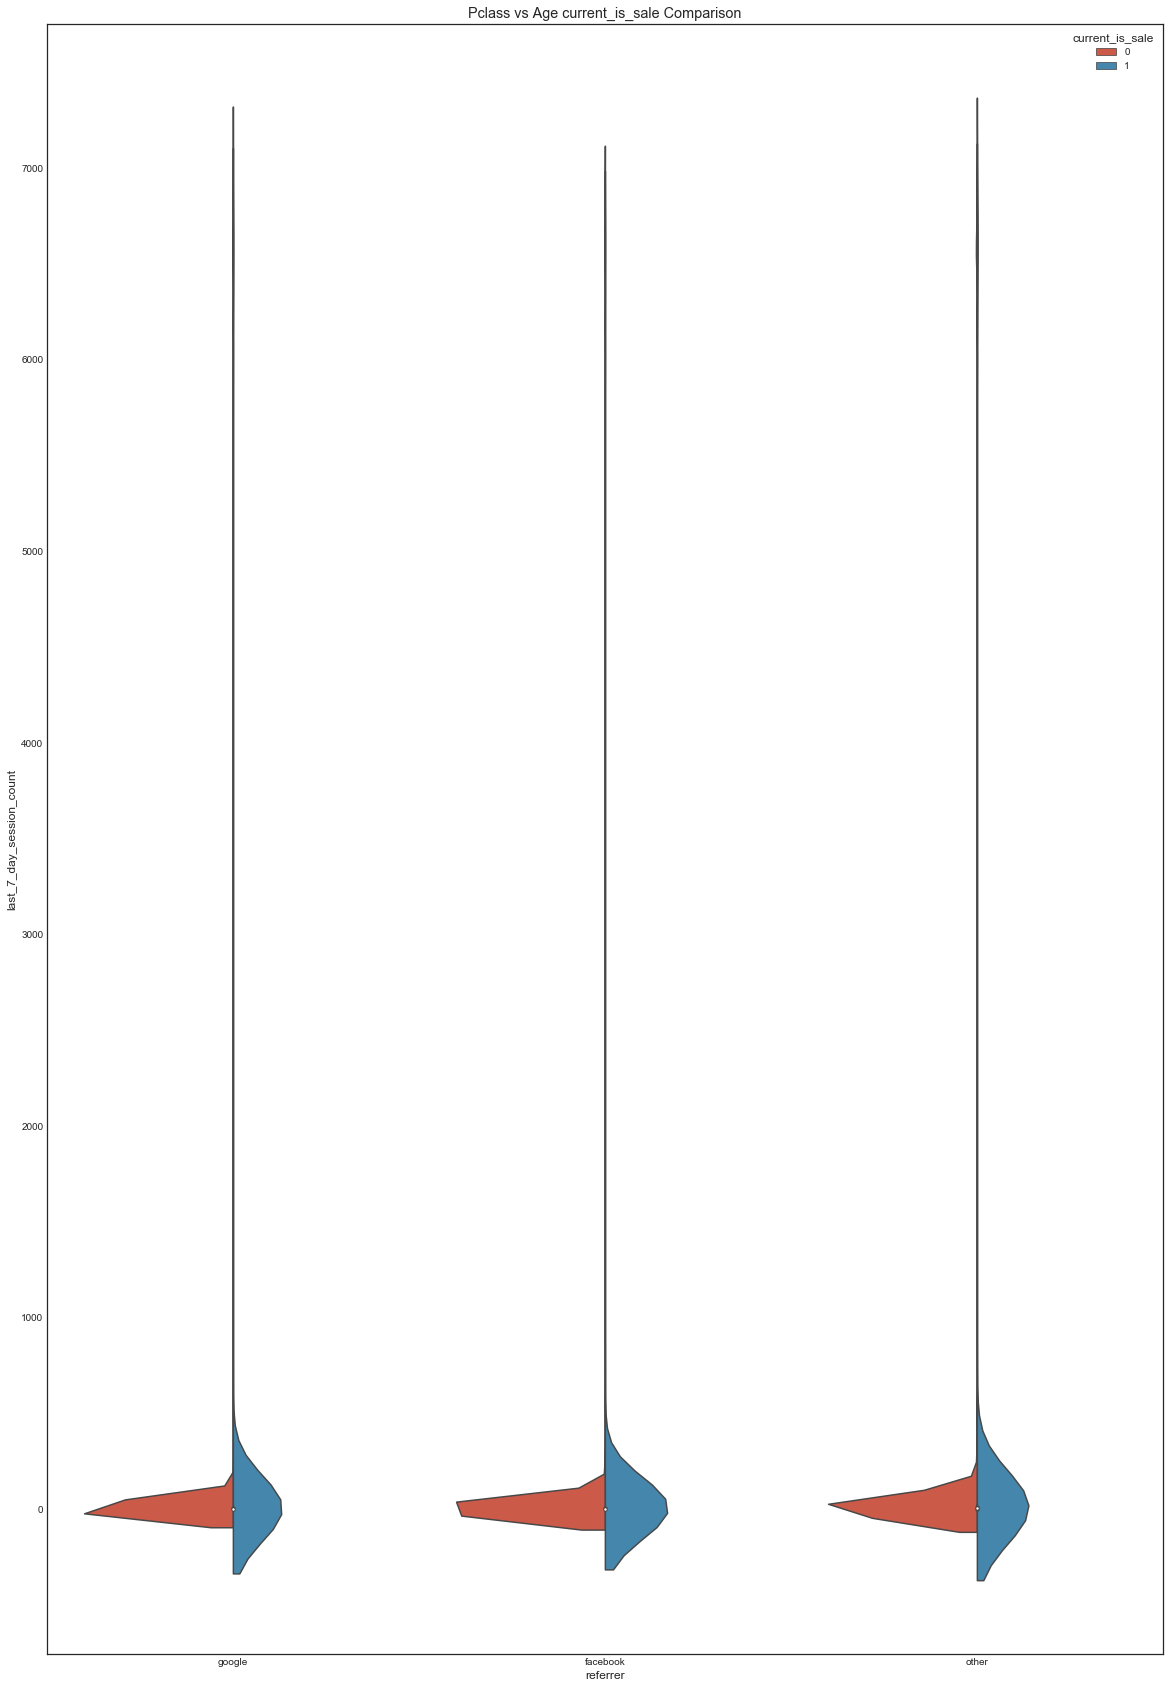

In [27]:
#fig, (axis1) = plt.subplots(1,1,figsize=(14,30))
plt.figure(figsize=(20,30))
axis1 = plt.subplot()
sns.violinplot(x = 'referrer', y = 'last_7_day_session_count', hue = 'current_is_sale', data = data, split = True, ax = axis1)
axis1.set_title('Pclass vs Age current_is_sale Comparison')

In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    #XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
#cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

In [31]:
for index, row in data1.iterrows(): 
    #random number generator: https://docs.python.org/2/library/random.html
    if random.random() > .5:     # Random float x, 0.0 <= x < 1.0    
        data1.set_value(index, 'Random_Predict', 1) #predict survived/1
    else: 
        data1.set_value(index, 'Random_Predict', 0) #predict died/0

print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data1['current_is_sale'], data1['Random_Predict'])*100))

Coin Flip Model Accuracy w/SciKit: 49.89%


In [33]:
data_train

,Unnamed: 0,current_total_landing_count,current_other_landing_count,current_product_landing_count,current_cart_landing_count,current_sale_amount,current_is_sale,current_avg_cart_amount,current_avg_visited_product_price,referrer,last_1_day_session_count,last_7_day_session_count,date
0,1,1,1,0,0,0,0,0,0,google,0,0,08/05/2014 09:09
1,2,1,0,1,0,0,0,0,0,google,0,3,09/05/2014 18:33
2,3,1,1,0,0,0,0,0,0,google,0,1,17/05/2014 17:59
3,4,2,2,0,0,0,0,0,0,facebook,1,7,18/05/2014 15:33
4,5,1,0,1,0,0,0,69,0,other,13,13,15/05/2014 16:59
5,6,1,0,1,0,0,0,0,0,other,33,33,17/05/2014 10:20
6,7,4,2,2,0,0,0,180,0,other,0,36,16/05/2014 08:16
7,8,2,2,0,0,0,0,0,0,other,2,2,08/05/2014 09:11
8,9,3,3,0,0,0,0,0,0,other,0,1,07/05/2014 12:48
9,10,2,0,1,1,0,0,155,23,other,63,124,18/05/2014 02:39
